In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas
tweet_sentiment = pandas.read_csv('/content/gdrive/MyDrive/tweet-clean-pola2.csv')
tweet_sentiment

,Unnamed: 0,full_text,date,polarity,subjectivity,analysis
0,0,"bbri lot stock money house, okay?",Mon Jul 19 07:13:44 +0000 2021,0.5,0.5,Positive
1,1,bbri full of positive prospects check analysis,Mon Jul 19 07:03:49 +0000 2021,28.863.636.363.636.300,5.477.272.727.272.720,Positive
2,2,share bbri lot aja,Mon Jul 19 05:48:39 +0000 2021,0.0,0.0,Neutral
3,3,rights issue bbri holding ultramicro,Mon Jul 19 05:32:19 +0000 2021,0.0,0.0,Neutral
4,4,bbri,Mon Jul 19 04:11:27 +0000 2021,0.0,0.0,Neutral
...,...,...,...,...,...,...
253,253,jih lot bbri ga wkwkwkwk,Sun Jul 11 15:52:42 +0000 2021,0.0,0.0,Neutral
254,254,one of the bosses of pt agroniaga tbk agro jk ...,Sun Jul 11 14:18:31 +0000 2021,0.0,0.0,Neutral
255,255,stock bandarmology analysis ihsg bbri agro bmh...,Sun Jul 11 09:04:07 +0000 2021,0.0,0.0,Neutral
256,256,stock bandarmology analysis ihsg bbri agro bmh...,Sun Jul 11 05:16:21 +0000 2021,0.0,0.0,Neutral


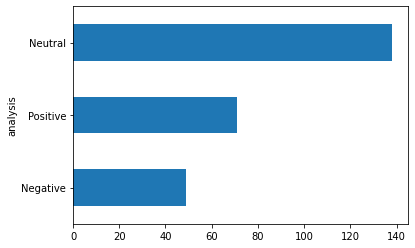

In [ ]:
import matplotlib.pyplot as plt

counts = tweet_sentiment.groupby('analysis').polarity.count()
counts = counts.sort_values(ascending=False)

fig = plt.figure(figsize=(6,4))
counts.plot.barh(ylim=0).invert_yaxis()

### Mengambil data saham sesuai range tweet yang diambil dan dihitung sentimennya.

In [ ]:
## sumber: https://medium.com/@a_dittt/cara-menghitung-return-saham-harian-menggunakan-python-cf6bf61939c5
import pandas_datareader as pdr
import datetime
# ticker = str(input("Masukkan Kode Saham? "))

# if not ".JK" in ticker:
#     ticker += ".JK"
#     start = str(input("Dari Tanggal? (yyyy-mm-dd) "))
#     end = str(input("Sampai Tanggal? (yyyy-mm-dd) "))
#     stockprice = pdr.data.get_data_yahoo(ticker, start, end)
#     stockpricelabel = (ticker + "_" + "sampai" + "_" + end)
#     stockprice.to_csv(stockpricelabel + ".csv")

In [ ]:
stock_price = pandas.read_csv('/content/gdrive/MyDrive/BBRI-11-19-c.csv')
stock_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-12,3800,3820,3750,3760,3760,119727200
1,2021-07-13,3800,3800,3760,3780,3780,159709500
2,2021-07-14,3780,3800,3700,3710,3710,105184100
3,2021-07-15,3750,3840,3730,3810,3810,127139100
4,2021-07-16,3850,3860,3810,3840,3840,98486200
5,2021-07-19,3850,3850,3780,3780,3780,63023000


In [ ]:
return_stock = stock_price['Close'].pct_change()
print(return_stock)

0         NaN
1    0.005319
2   -0.018519
3    0.026954
4    0.007874
5   -0.015625
Name: Close, dtype: float64


In [ ]:
return_harian = return_stock.mean()

In [ ]:
print(str(round(return_harian * 100, 2)) + '%')

0.12%


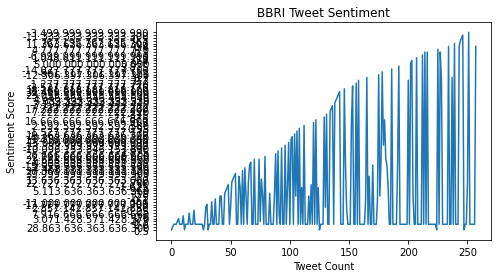

In [ ]:
import matplotlib.pyplot as plt
plt.plot((tweet_sentiment['polarity'].values.tolist()))
plt.title('BBRI Tweet Sentiment')
plt.ylabel('Sentiment Score')
plt.xlabel('Tweet Count')
plt.show()

In [ ]:
date_list = []

date_list.append(tweet_sentiment['date'].tolist())

In [ ]:
from datetime import datetime
import re
import string

tweet_date_list = []

for i in date_list[0]:
    x = str(i)
    x = re.sub(r'[+]+', '', x)
    x = re.sub(r'\b(' + ' 0000' + r')\b', '', x)
    x = re.sub(r'\b([0-9][0-9]:[0-9][0-9]:[0-9][0-9]+' + r' )\b', '', x)
    x = re.sub(r'\b(' + '^[\s\S]{0,4}' + r')\b', '', x)
    x = re.sub(r'\b(' + 'Jul' + r')\b', '07', x)
    x = re.split("\s", x)
    x = "-".join(x)
  
#     print(x)
    tweet_date = datetime.strptime(x, '%m-%d-%Y').strftime('%Y-%m-%d')
    tweet_date_list.append(tweet_date)

In [ ]:
type(tweet_date_list)

list

In [ ]:
my_df = pandas.DataFrame(tweet_date_list)
my_df['polarity'] = tweet_sentiment['polarity']
my_df.rename(columns={0: 'date'})

,date,polarity
0,2021-07-19,0.5
1,2021-07-19,28.863.636.363.636.300
2,2021-07-19,0.0
3,2021-07-19,0.0
4,2021-07-19,0.0
...,...,...
253,2021-07-11,0.0
254,2021-07-11,0.0
255,2021-07-11,0.0
256,2021-07-11,0.0


In [ ]:
grouped_df = my_df.groupby(my_df[0])

mean_df = grouped_df.mean()

mean_df = mean_df.reset_index()
mean_df
mean_df.rename(columns={0: 'date'})

DataError: ignored

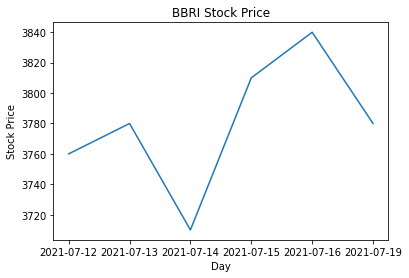

In [ ]:
plt.plot(stock_price['Date'], (stock_price['Close'].values.tolist()))
plt.title('BBRI Stock Price')
plt.ylabel('Stock Price')
plt.xlabel('Day')
plt.show()

In [ ]:
plt.plot(mean_df[0].values.tolist(), (mean_df['polarity'].values.tolist()))
plt.title('BBRI Tweet Sentiment')
plt.ylabel('Polarity')
plt.xlabel('Day')
plt.show()

NameError: ignored

In [ ]:
corr = pandas.merge(
    mean_df,
    stock_price,
    left_on=[0],
    right_on=['Date']
)

In [ ]:
corr_new = corr.drop(columns=[0, 'High', 'Low', 'Open', 'Volume', 'Adj Close'])
corr_new.columns = ['Polarity', 'Date', 'Close']
corr_new

,Polarity,Date,Close
0,0.057201,2021-07-12,3760
1,0.008535,2021-07-13,3780
2,0.033740,2021-07-14,3710
3,0.059076,2021-07-15,3810
4,0.052966,2021-07-16,3840
5,0.153521,2021-07-19,3780


In [ ]:
kendalcorr = corr_new.corr(method='kendall')
kendalcorr

,Polarity,Close
Polarity,1.000000,0.138013
Close,0.138013,1.000000


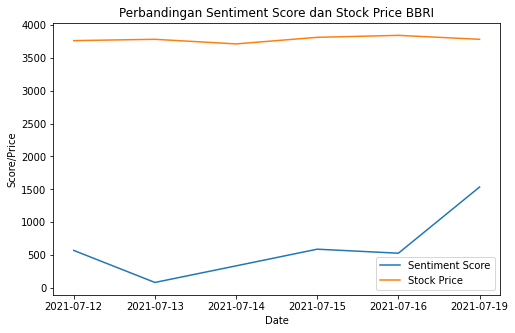

In [ ]:
plt.figure(figsize=(8,5))
x1 = corr_new['Date']
y1 = corr_new['Polarity']*10000
plt.plot(x1, y1, label = "Sentiment Score")
x2 = corr_new['Date']
y2 = corr_new['Close']
plt.plot(x2, y2, label = "Stock Price")
plt.xlabel('Date')
plt.ylabel('Score/Price')
plt.title('Perbandingan Sentiment Score dan Stock Price BBRI')
plt.legend()
plt.show()

# Berdasarkan korelasi metode Kendall, harga saham tidak memiliki asosiasi yang kuat dengan nilai rata-rata sentimen tweet di Twitter

### Cross Validation
sumber: https://www.kaggle.com/babbler/cross-validation-considerations

##### K-fold Cross Validation

In [ ]:
#sumber: https://www.kaggle.com/babbler/cross-validation-considerations
print("Sentiment Count:", tweet_sentiment['polarity'].size)
print("Sentiment Distribution:", tweet_sentiment['polarity'].value_counts(normalize=True), sep='\n')

Sentiment Count: 258
Sentiment Distribution:
 0.000000    0.534884
-0.125000    0.031008
 0.500000    0.027132
-0.062500    0.023256
-0.155556    0.019380
               ...   
 0.364646    0.003876
-0.140278    0.003876
-0.350000    0.003876
 0.177778    0.003876
-0.352778    0.003876
Name: polarity, Length: 71, dtype: float64


In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for f, split in enumerate(skf.split(tweet_sentiment, tweet_sentiment['analysis'])):
    print("Fold", f + 1, "-----")
    test = tweet_sentiment.iloc[split[1]]
    print("Size:", test.size)
    print("Sentiment Distribution:", tweet_sentiment['polarity'].value_counts(normalize=True), "", sep='\n')

Fold 1 -----
Size: 312
Sentiment Distribution:
 0.000000    0.534884
-0.125000    0.031008
 0.500000    0.027132
-0.062500    0.023256
-0.155556    0.019380
               ...   
 0.364646    0.003876
-0.140278    0.003876
-0.350000    0.003876
 0.177778    0.003876
-0.352778    0.003876
Name: polarity, Length: 71, dtype: float64

Fold 2 -----
Size: 312
Sentiment Distribution:
 0.000000    0.534884
-0.125000    0.031008
 0.500000    0.027132
-0.062500    0.023256
-0.155556    0.019380
               ...   
 0.364646    0.003876
-0.140278    0.003876
-0.350000    0.003876
 0.177778    0.003876
-0.352778    0.003876
Name: polarity, Length: 71, dtype: float64

Fold 3 -----
Size: 312
Sentiment Distribution:
 0.000000    0.534884
-0.125000    0.031008
 0.500000    0.027132
-0.062500    0.023256
-0.155556    0.019380
               ...   
 0.364646    0.003876
-0.140278    0.003876
-0.350000    0.003876
 0.177778    0.003876
-0.352778    0.003876
Name: polarity, Length: 71, dtype: float64

F

In [ ]:
Id = "Positive"

print("Analysis", Id, "Sentiment Counts:\n")
for f, split in enumerate(skf.split(tweet_sentiment, tweet_sentiment['analysis'])):
    print("Fold ", f + 1, ":", sep='')
    test = tweet_sentiment['analysis'].iloc[split[1]]
    if Id in test.values:
        print(test[test == Id].value_counts(sort=False), "\n")
    else:
        print("None\n")
    
    # use this later
    if f == 0:
        split1 = split

Analysis Positive Sentiment Counts:

Fold 1:
Positive    15
Name: analysis, dtype: int64 

Fold 2:
Positive    14
Name: analysis, dtype: int64 

Fold 3:
Positive    14
Name: analysis, dtype: int64 

Fold 4:
Positive    14
Name: analysis, dtype: int64 

Fold 5:
Positive    14
Name: analysis, dtype: int64 



In [ ]:
train = tweet_sentiment.iloc[split1[0]]
test = tweet_sentiment.iloc[split1[1]]

print("Train -----\nAnalysis =", Id, "Counts:")
print(train['analysis'][train['analysis'] == Id].value_counts(sort=False))
display(train['analysis'][(train['analysis'] == Id)])

print("Test -----\nAnalysis =", Id, "Counts:")
print(test['analysis'][test['analysis'] == Id].value_counts(sort=False))
display(test['analysis'][(test['analysis'] == Id)])

Train -----
Analysis = Positive Counts:
Positive    56
Name: analysis, dtype: int64


0      Positive
1      Positive
6      Positive
10     Positive
11     Positive
15     Positive
27     Positive
29     Positive
30     Positive
31     Positive
46     Positive
50     Positive
51     Positive
52     Positive
53     Positive
54     Positive
57     Positive
60     Positive
65     Positive
67     Positive
70     Positive
74     Positive
76     Positive
83     Positive
87     Positive
88     Positive
91     Positive
99     Positive
101    Positive
102    Positive
108    Positive
122    Positive
125    Positive
130    Positive
134    Positive
136    Positive
139    Positive
140    Positive
141    Positive
142    Positive
146    Positive
167    Positive
177    Positive
180    Positive
192    Positive
200    Positive
202    Positive
207    Positive
214    Positive
216    Positive
225    Positive
227    Positive
234    Positive
239    Positive
243    Positive
257    Positive
Name: analysis, dtype: object

Test -----
Analysis = Positive Counts:
Positive    15
Name: analysis, dtype: int64


45     Positive
79     Positive
90     Positive
104    Positive
112    Positive
135    Positive
158    Positive
165    Positive
181    Positive
224    Positive
228    Positive
237    Positive
244    Positive
247    Positive
250    Positive
Name: analysis, dtype: object

##### Group K-fold Cross Validation

In [ ]:
from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=3)
print("Analysis", Id, "Sentiment Counts:\n")
for f, split in enumerate(gkf.split(tweet_sentiment, groups=tweet_sentiment['analysis'])):
    print("Fold ", f + 1, ":", sep='')
    test = tweet_sentiment['analysis'].iloc[split[1]]
    if Id in test.values:
        print(test[test == Id].value_counts(sort=False), "\n")
    else:
        print("None\n")

Analysis Positive Sentiment Counts:

Fold 1:
None

Fold 2:
Positive    71
Name: analysis, dtype: int64 

Fold 3:
None



In [ ]:
for f, split in enumerate(gkf.split(tweet_sentiment, groups=tweet_sentiment['analysis'])):
    print("Fold", f + 1, "-----")
    test = tweet_sentiment['analysis'].iloc[split[1]]
    print("Size:", test.size)
    print("Sentiment Distribution:", test.value_counts(normalize=True), "", sep='\n')

Fold 1 -----
Size: 138
Sentiment Distribution:
Neutral    1.0
Name: analysis, dtype: float64

Fold 2 -----
Size: 71
Sentiment Distribution:
Positive    1.0
Name: analysis, dtype: float64

Fold 3 -----
Size: 49
Sentiment Distribution:
Negative    1.0
Name: analysis, dtype: float64



In [ ]:
import nltk
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf',  TfidfVectorizer()),
    ('lr', LogisticRegression())
])

analyzer = TfidfVectorizer().build_analyzer()
stemmer = nltk.stem.SnowballStemmer('english')

pipeline.set_params(
    tfidf__analyzer=lambda x: (stemmer.stem(w) for w in analyzer(x)),
    tfidf__ngram_range=(1,2),
    lr__solver='sag',
    lr__multi_class='multinomial',
    lr__penalty='l2', 
    lr__tol=0.001, 
    lr__verbose=False)

param_grid = {
    'lr__C': np.linspace(1, 3, 11) # I think the value is close to 2 based on previous testing, and want to reduce runtime
}

gs = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=gkf,
    verbose=1,
    return_train_score=False)

gs.fit(tweet_sentiment['full_text'], y=tweet_sentiment['analysis'], groups=tweet_sentiment['polarity'])
print("Best C:", gs.best_params_['lr__C'])

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best C: 2.2


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.9s finished


In [ ]:
from sklearn.model_selection import cross_validate

pipeline.set_params(lr__C=gs.best_params_['lr__C'])

print("Running stratified k-fold...", end='')
skf_results = cross_validate(
    pipeline, 
    X=tweet_sentiment['full_text'], 
    y=tweet_sentiment['analysis'], 
    cv=skf, 
    return_train_score=False, 
    verbose=False)
print(" done.")

print("Running group k-fold...", end='')
gkf_results = cross_validate(
    pipeline, 
    X=tweet_sentiment['full_text'], 
    y=tweet_sentiment['analysis'], 
    groups=tweet_sentiment['polarity'], 
    cv=gkf, 
    return_train_score=False, 
    verbose=False)
print(" done.\n")

print("Stratified k-fold average accuracy:", np.mean(skf_results['test_score']))
print("Group k-fold average accuracy:", np.mean(gkf_results['test_score']))

Running stratified k-fold... done.
Running group k-fold... done.

Stratified k-fold average accuracy: 0.6785822021116139
Group k-fold average accuracy: 0.07222222222222223
